
--- KẾT QUẢ CÁCH 2: BP TỐI THIỂU PHI TUYẾN (Tối ưu) ---
Hệ số a: 0.021642
Hệ số b: 0.000112363774706
Sức chứa K = a/b: 192.61 triệu người


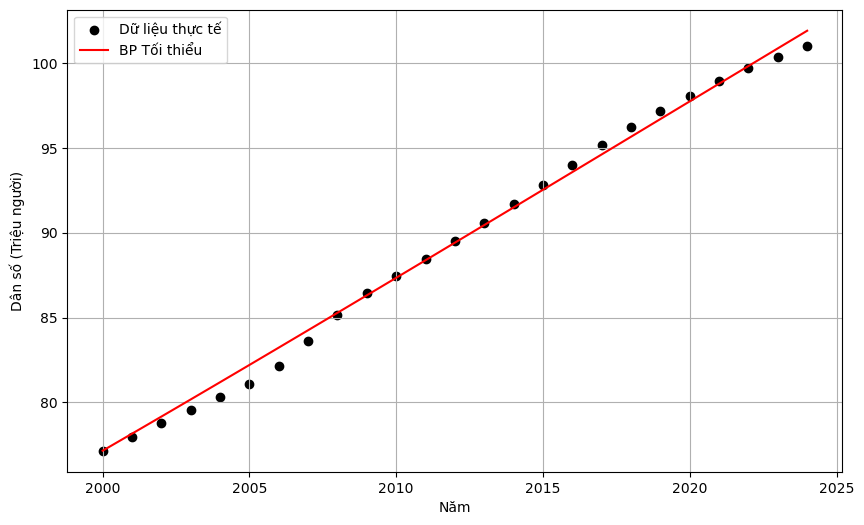

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

# --- BƯỚC 1: NHẬP DỮ LIỆU (Thay số liệu thật của VN vào đây) ---
# Ví dụ: Dữ liệu mẫu (Giai đoạn 2000 - 2020)
years = np.array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
                  2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                  2018, 2019, 2020, 2021, 2022, 2023, 2024])  # Năm
population = np.array([77154011, 77969361, 78772224, 79563777, 80338971, 81088313, 82167897,
                        83633375, 85175788, 86460018, 87455152, 88468314, 89510356, 90573104,
                        91679578, 92823254, 94000117, 95176977, 96237319, 97173776, 98079191, 
                        98935098, 99680655, 100352192, 100987686]) / 1e6  # Chuyển về triệu người


# Chuyển đổi thời gian về mốc t = 0 (tương ứng năm 2000)
t_data = years - years[0]
P_data = population
P0 = P_data[0] # Dân số ban đầu



print("\n--- KẾT QUẢ CÁCH 2: BP TỐI THIỂU PHI TUYẾN (Tối ưu) ---")

# 1. Định nghĩa hàm nghiệm chính xác (Equation 19 trong bài báo)
def logistic_solution_paper(t, a, b):
    # N(t) = (a/b) / (1 + (a/(b*N0) - 1) * exp(-a*t))
    K = a/b
    term = (K / P0 - 1) * np.exp(-a * t)
    return K / (1 + term)

# 2. Dùng curve_fit để tìm a, b tối ưu
# p0 là giá trị dự đoán ban đầu 
initial_guess = [0.03619, 3.31e-10] 
# bounds để ràng buộc a > 0 và b > 0
params, cov = curve_fit(logistic_solution_paper, t_data, P_data, p0=initial_guess, bounds=(0, [1, 1]))

a_2, b_2 = params

print(f"Hệ số a: {a_2:.6f}")
print(f"Hệ số b: {b_2:.15f}")
print(f"Sức chứa K = a/b: {a_2/b_2:.2f} triệu người")

# ==============================================================================
# VẼ ĐỒ THỊ SO SÁNH
# ==============================================================================
plt.figure(figsize=(10, 6))

# Dữ liệu thực tế
plt.scatter(years, P_data, color='black', label='Dữ liệu thực tế')

# Đường dự báo 
P_pred_2 = logistic_solution_paper(t_data, a_2, b_2)
plt.plot(years, P_pred_2, color='red', label='BP Tối thiểu')


plt.xlabel('Năm')
plt.ylabel('Dân số (Triệu người)')
plt.legend()
plt.grid(True)
plt.show()

109.316435


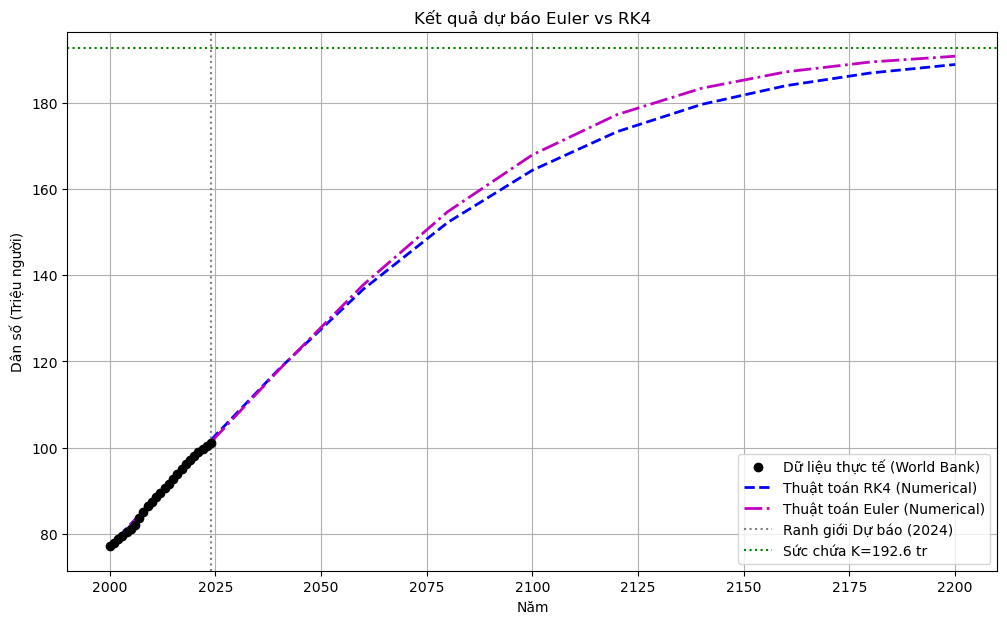

Lỗi tối đa của RK4 so với lý thuyết: 0.0039634961 triệu người
Lỗi tối đa của Euler so với lý thuyết: 3.9520 triệu người


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Dữ liệu thực tế (2000 - 2024) để đối chiếu
years = np.array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
                  2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                  2018, 2019, 2020, 2021, 2022, 2023, 2024])  # Năm
population = np.array([77154011, 77969361, 78772224, 79563777, 80338971, 81088313, 82167897,
                        83633375, 85175788, 86460018, 87455152, 88468314, 89510356, 90573104,
                        91679578, 92823254, 94000117, 95176977, 96237319, 97173776, 98079191, 
                        98935098, 99680655, 100352192, 100987686]) / 1e6  # Chuyển về triệu người
# nghiệm tường minh
a = 0.03619
K_0 = 109316435 / 1e6 # 109 triệu người (từ kết quả tính toán trước đó)

#Runge-kutta 4 + Euler
a_1 = 0.021642     # Tốc độ tăng trưởng
b_1 = 0.000112363774706   # Hệ số cạnh tranh
K = a_1 / b_1          # Sức chứa môi trường (~192.61)
N0 = population[0]        # Dân số gốc năm 2000

# Thời gian dự báo (2000 -> 2050)
t_start = 2000
t_end = 2050
h = 1 # Bước nhảy
t_eval = np.arange(t_start, t_end + 1, h)

#CÁCH 1: NGHIỆM TƯỜNG MINH (EXACT SOLUTION) ---
def exact_solution(t):
    # Chuyển đổi t thực tế sang t tính từ 0 (2000 là mốc 0)
    t_norm = t - t_start 
    # Công thức: N(t) = K / (1 + (K/N0 - 1) * e^(-a*t))
    return K_0 / (1 + (K_0/N0 - 1) * np.exp(-a * t_norm))

N_exact = exact_solution(t_eval)

# --- 3. CÁCH 2: GIẢI TÍCH SỐ RUNGE-KUTTA 4 (RK4) ---
def dN_dt(t, N):
    return a_1 * N - b_1 * N**2

N_rk4 = [N0]
current_N = N0

N_euler = [N0]
current_N_euler = N0

# CÁCH 2: Euler
N_euler = [N0]
current_N_euler = N0

for t in t_eval[:-1]:
    # Tính đạo hàm tại thời điểm hiện tại
    dN = dN_dt(t, current_N_euler)
    # Cập nhật dân số sử dụng phương pháp Euler
    current_N_euler += h * dN
    N_euler.append(current_N_euler)

N_euler = np.array(N_euler)

# CÁCH 3: Ruge-Kutta 4 
N_rk4 = [N0]
current_N = N0

# Chạy vòng lặp RK4
for t in t_eval[:-1]:
    k1 = h * dN_dt(t, current_N)
    k2 = h * dN_dt(t + 0.5*h, current_N + 0.5*k1)
    k3 = h * dN_dt(t + 0.5*h, current_N + 0.5*k2)
    k4 = h * dN_dt(t + h, current_N + k3)
    
    current_N += (k1 + 2*k2 + 2*k3 + k4) / 6.0
    N_rk4.append(current_N)

N_rk4 = np.array(N_rk4)

# --- 4. VẼ BIỂU ĐỒ SO SÁNH ---
plt.figure(figsize=(12, 7))

# Vẽ dữ liệu thực tế (Chấm tròn đen)
plt.scatter(years, population, color='black', label='Dữ liệu thực tế (World Bank)', zorder=5)

# Vẽ đường Nghiệm tường minh (Nét liền đỏ)
#plt.plot(t_eval, N_exact, 'r-', linewidth=4, alpha=0.5, label='Nghiệm tường minh (Exact)')

# Vẽ đường RK4 (Nét đứt xanh dương) - Vẽ đè lên để thấy sự trùng khớp
plt.plot(t_eval, N_rk4, 'b--', linewidth=2, label='Thuật toán RK4 (Numerical)')

plt.plot(t_eval, N_euler, 'm-.', linewidth=2, label='Thuật toán Euler (Numerical)')

# Đường Sức chứa K
plt.axvline(x=2024, color='gray', linestyle=':', label='Ranh giới Dự báo (2024)')
plt.axhline(y=K, color='green', linestyle=':', label=f'Sức chứa K={K:.1f} tr')

#plt.title('So sánh kết quả dự báo: RK4 vs Nghiệm tường minh')
plt.title("Kết quả dự báo Euler vs RK4")
plt.xlabel('Năm')
plt.ylabel('Dân số (Triệu người)')
plt.legend()
plt.grid(True)
plt.show()

# --- 5. KIỂM TRA SAI SỐ GIỮA 2 CÁCH ---
def validation_exact(t):
    t_norm = t - t_start 
    return K / (1 + (K/N0 - 1) * np.exp(-a_1 * t_norm))

N_val = validation_exact(t_eval)
error_rk4 = np.max(np.abs(N_val - N_rk4))
error_euler = np.max(np.abs(N_val - N_euler))

print(f"Lỗi tối đa của RK4 so với lý thuyết: {error_rk4:.10f} triệu người")
print(f"Lỗi tối đa của Euler so với lý thuyết: {error_euler:.4f} triệu người")

In [67]:
n_data = len(population)  # = 25 năm (2000–2024)
N_exact_eval = N_exact[:n_data]
N_rk4_eval   = N_rk4[:n_data]
# MAPE nghiệm tường minh Logistic
mape_exact = np.mean(
    np.abs((population - N_exact_eval) / population)
) * 100

print(f"MAPE (Nghiệm tường minh Logistic): {mape_exact:.2f}%")

# MAPE Runge–Kutta bậc 4
mape_rk4 = np.mean(
    np.abs((population - N_rk4_eval) / population)
) * 100

print(f"MAPE (Runge-Kutta bậc 4): {mape_rk4:.2f}%")



MAPE (Nghiệm tường minh Logistic): 3.80%
MAPE (Runge-Kutta bậc 4): 0.46%


In [ ]:
import numpy as np
import pandas as pd

# --- 1. THIẾT LẬP THAM SỐ (Bộ tham số tối ưu bạn đã tìm được) ---
a = 0.035953                # Hệ số tăng trưởng
b = 0.000017536670054       # Hệ số cạnh tranh
N0 = 713561406/1e6            # Dân số năm 1981 (Triệu người)
t_start = 1981
t_end = 2031
h = 1                       # Bước nhảy 1 năm

# --- 2. CÁC HÀM TÍNH TOÁN ---

# Hàm công thức giải tích (Exact Solution)
def exact_solution(t, N0, a, b, t_start):
    K = a / b
    dt = t - t_start
    return K / (1 + (K/N0 - 1) * np.exp(-a * dt))

# Hàm đạo hàm cho RK4: f(t, N) = aN - bN^2
def f(t, N, a, b):
    return a * N - b * N**2

# --- 3. VÒNG LẶP RUNGE-KUTTA 4 ---
# Tạo danh sách chứa kết quả
results = []

# Khởi tạo giá trị ban đầu
current_N = N0

# Lưu năm đầu tiên (1981)
results.append({
    'Năm': 1981,
    'RK4 (Triệu người)': N0,
    'Giải tích (Triệu người)': N0,
    'Sai số Tuyệt đối': 0.0
})

# Bắt đầu chạy vòng lặp từ 1981 đến 2019 để tính cho năm sau
for t in range(t_start, t_end):
    # Tính 4 hệ số k
    k1 = h * f(t, current_N, a, b)
    k2 = h * f(t + 0.5*h, current_N + 0.5*k1, a, b)
    k3 = h * f(t + 0.5*h, current_N + 0.5*k2, a, b)
    k4 = h * f(t + h, current_N + k3, a, b)
    
    # Cập nhật N cho năm tiếp theo (t+1)
    current_N = current_N + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
    
    # Tính giá trị chính xác bằng công thức để so sánh
    next_year = t + 1
    exact_val = exact_solution(next_year, N0, a, b, t_start)
    
    # Lưu kết quả vào danh sách
    results.append({
        'Năm': next_year,
        'RK4 (Triệu người)': current_N,
        'Giải tích (Triệu người)': exact_val,
        'Sai số Tuyệt đối': abs(current_N - exact_val)
    })

# --- 4. XUẤT RA BẢNG DỮ LIỆU ---
df = pd.DataFrame(results)

# Cấu hình để in ra số đẹp (4 chữ số thập phân)
pd.set_option('display.float_format', '{:.10f}'.format)

# Cấu hình để in ra TOÀN BỘ dòng (không bị ẩn)
pd.set_option('display.max_rows', None)

print("--- BẢNG DỰ BÁO CHI TIẾT DÂN SỐ (1981 - 2020) ---")
print(df)

print(df[df['Năm'] == 2024])
print(df[df['Năm'] == 2025])


# --- 5. XUẤT RA FILE EXCEL (Nếu bạn cần nộp file) ---
# df.to_excel("KetQua_DuBao_1981_2020.xlsx", index=False)
# print("\nĐã xuất kết quả ra file KetQua_DuBao_1981_2020.xlsx")

Hệ số đã tính:
α (tái tạo tài nguyên) = 0.0500
β (tiêu thụ) = 0.000625
γ (tử vong) = 0.0200
δ (tăng trưởng) = 0.000200
Điểm cân bằng: R=100.0, N=80.0

Kết quả mô phỏng:
Dân số - Min: 70.47, Max: 90.36, Cuối: 77.42
Tài nguyên - Min: 81.62, Max: 120.95, Cuối: 120.18


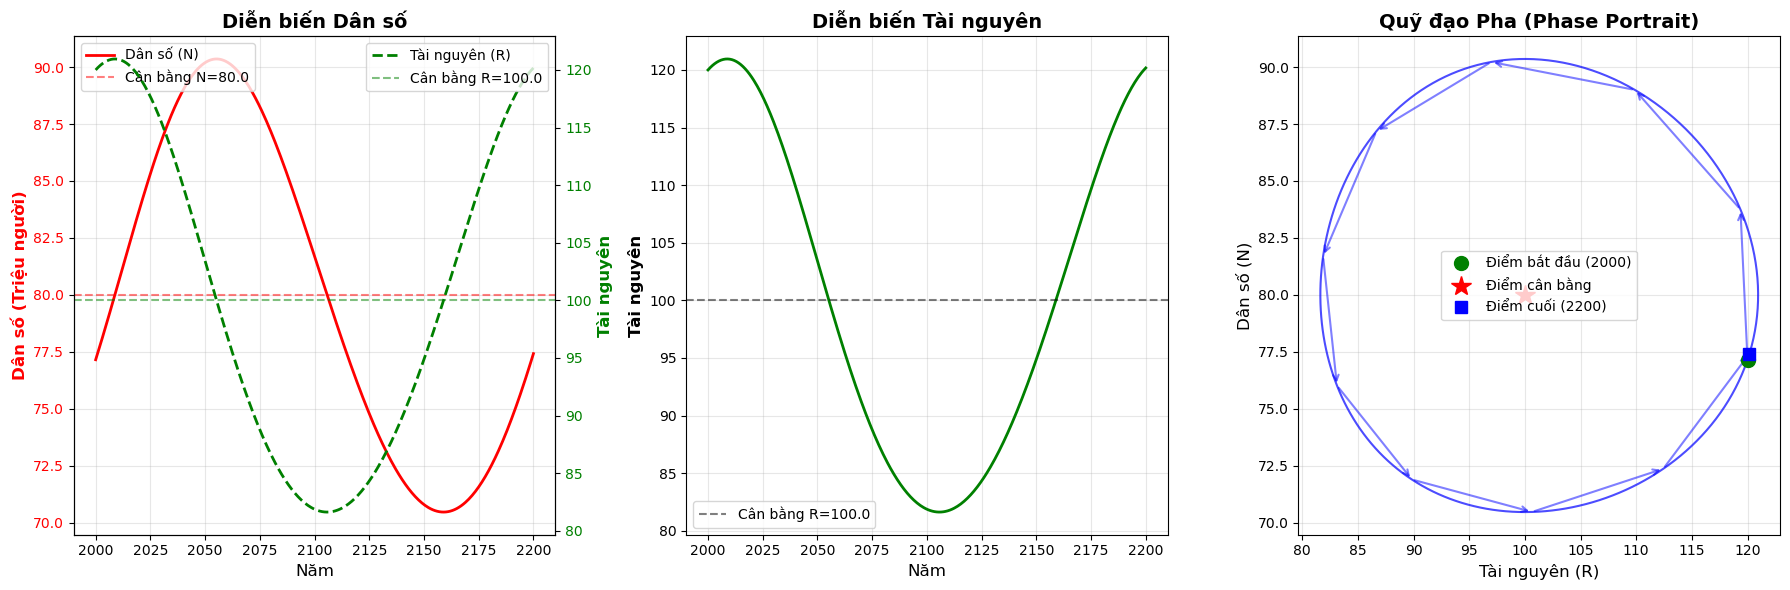

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. THIẾT LẬP THAM SỐ ---
# Trạng thái cân bằng mong muốn
N_eq = 80.0   # Dân số cân bằng (Triệu người)
R_eq = 100.0  # Tài nguyên cân bằng (Đơn vị)

# Hệ số tự nhiên (Giả định)
alpha = 0.05  # Tái tạo tài nguyên (5%)
gamma = 0.02  # Tử vong tự nhiên (2%)

# Tính toán hệ số tương tác từ điểm cân bằng
# R' = 0 => alpha*R - beta*R*N = 0 => beta = alpha / N_eq
# N' = 0 => delta*R*N - gamma*N = 0 => delta = gamma / R_eq
beta = alpha / N_eq   
delta = gamma / R_eq  


print(f"Hệ số đã tính:")
print(f"α (tái tạo tài nguyên) = {alpha:.4f}")
print(f"β (tiêu thụ) = {beta:.6f}")
print(f"γ (tử vong) = {gamma:.4f}")
print(f"δ (tăng trưởng) = {delta:.6f}")
print(f"Điểm cân bằng: R={R_eq}, N={N_eq}\n")

# Điều kiện ban đầu (Năm 2000)
t_start = 2000
t_end = 2200
h = 0.5

N0 = 77.154   # Dân số VN 2000
R0 = 120.0    # Tài nguyên cao hơn mức cân bằng

# --- 2. HỆ PHƯƠNG TRÌNH VI PHÂN ---
def sys_deriv(t, state):
    R, N = state
    
    # Lotka-Volterra cải tiến
    dRdt = alpha*R - beta*R*N
    dNdt = delta*R*N - gamma*N
    
    if R < 0:
        dRdt = 0
    if N < 0:
        dNdt = 0
    
    return np.array([dRdt, dNdt])

# --- 3. THUẬT TOÁN RK4 ---
def rk4_system(t_start, t_end, R0, N0, h):
    years = np.arange(t_start, t_end + h, h)
    states = []
    
    curr_state = np.array([R0, N0], dtype=float)
    states.append(curr_state.copy())
    
    for t in years[:-1]:
        k1 = h * sys_deriv(t, curr_state)
        k2 = h * sys_deriv(t + 0.5*h, curr_state + 0.5*k1)
        k3 = h * sys_deriv(t + 0.5*h, curr_state + 0.5*k2)
        k4 = h * sys_deriv(t + h, curr_state + k3)
        
        curr_state += (k1 + 2*k2 + 2*k3 + k4) / 6.0
        
        curr_state = np.maximum(curr_state, 0)
        
        states.append(curr_state.copy())
        
    return years, np.array(states)

# --- 4. CHẠY MÔ PHỎNG ---
years_sim, results = rk4_system(t_start, t_end, R0, N0, h)
R_vals = results[:, 0]
N_vals = results[:, 1]

#  In thống kê
print(f"Kết quả mô phỏng:")
print(f"Dân số - Min: {N_vals.min():.2f}, Max: {N_vals.max():.2f}, Cuối: {N_vals[-1]:.2f}")
print(f"Tài nguyên - Min: {R_vals.min():.2f}, Max: {R_vals.max():.2f}, Cuối: {R_vals[-1]:.2f}")

# --- 5. VẼ ĐỒ THỊ CẢI TIẾN ---
fig = plt.figure(figsize=(18, 6))

# Đồ thị 1: Diễn biến theo thời gian
ax1 = plt.subplot(1, 3, 1)
ax1.plot(years_sim, N_vals, 'r-', linewidth=2, label='Dân số (N)')
ax1.axhline(y=N_eq, color='r', linestyle='--', alpha=0.5, label=f'Cân bằng N={N_eq}')
ax1.set_xlabel('Năm', fontsize=12)
ax1.set_ylabel('Dân số (Triệu người)', color='red', fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left')
ax1.set_title('Diễn biến Dân số', fontsize=14, fontweight='bold')

# Trục phụ cho Tài nguyên
ax1_twin = ax1.twinx()
ax1_twin.plot(years_sim, R_vals, 'g--', linewidth=2, label='Tài nguyên (R)')
ax1_twin.axhline(y=R_eq, color='g', linestyle='--', alpha=0.5, label=f'Cân bằng R={R_eq}')
ax1_twin.set_ylabel('Tài nguyên', color='green', fontsize=12, fontweight='bold')
ax1_twin.tick_params(axis='y', labelcolor='green')
ax1_twin.legend(loc='upper right')

# Đồ thị 2: Chỉ Tài nguyên
ax2 = plt.subplot(1, 3, 2)
ax2.plot(years_sim, R_vals, 'g-', linewidth=2)
ax2.axhline(y=R_eq, color='k', linestyle='--', alpha=0.5, label=f'Cân bằng R={R_eq}')
ax2.set_xlabel('Năm', fontsize=12)
ax2.set_ylabel('Tài nguyên', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_title('Diễn biến Tài nguyên', fontsize=14, fontweight='bold')

# Đồ thị 3: Quỹ đạo Pha
ax3 = plt.subplot(1, 3, 3)
ax3.plot(R_vals, N_vals, 'b-', linewidth=1.5, alpha=0.7)
ax3.plot(R0, N0, 'go', markersize=10, label='Điểm bắt đầu (2000)', zorder=5)
ax3.plot(R_eq, N_eq, 'r*', markersize=15, label='Điểm cân bằng', zorder=5)
ax3.plot(R_vals[-1], N_vals[-1], 'bs', markersize=8, label='Điểm cuối (2200)', zorder=5)

# Vẽ hướng quỹ đạo
step = len(R_vals) // 10
for i in range(0, len(R_vals)-step, step):
    ax3.annotate('', xy=(R_vals[i+step], N_vals[i+step]), 
                xytext=(R_vals[i], N_vals[i]),
                arrowprops=dict(arrowstyle='->', color='blue', lw=1.5, alpha=0.5))

ax3.set_xlabel('Tài nguyên (R)', fontsize=12)
ax3.set_ylabel('Dân số (N)', fontsize=12)
ax3.set_title('Quỹ đạo Pha (Phase Portrait)', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend()

plt.tight_layout()
plt.show()

from scipy.signal import find_peaks

peaks_N, _ = find_peaks(N_vals, distance=20)
if len(peaks_N) > 1:
    periods = np.diff(years_sim[peaks_N])
    print(f"\nChu kỳ dao động trung bình: {periods.mean():.1f} năm")
    print(f"Số chu kỳ hoàn chỉnh: {len(peaks_N)-1}")

--- BẢNG 1: SO SÁNH VỚI DỮ LIỆU THỰC TẾ (2000 - 2024) [Đơn vị: Người] ---
 Năm        Thực tế    RK4 (Set 2)  Exact (Set 1)  % Sai số RK4  % Sai số Exact
2000  77,154,011.00  77,154,011.00  77,154,011.00          0.00            0.00
2001  77,969,361.00  78,268,967.39  77,969,355.19          0.38            0.00
2002  78,772,224.00  79,276,522.77  78,772,212.56          0.64            0.00
2003  79,563,777.00  80,287,940.69  79,562,354.22          0.91            0.00
2004  80,338,971.00  81,303,005.20  80,339,574.87          1.20            0.00
2005  81,088,313.00  82,321,497.12  81,103,692.50          1.52            0.02
2006  82,167,897.00  83,343,194.14  81,854,548.03          1.43            0.38
2007  83,633,375.00  84,367,871.07  82,592,004.93          0.88            1.25
2008  85,175,788.00  85,395,299.98  83,315,948.75          0.26            2.18
2009  86,460,018.00  86,425,250.44  84,026,286.51          0.04            2.81
2010  87,455,152.00  87,457,489.71  84,722,946

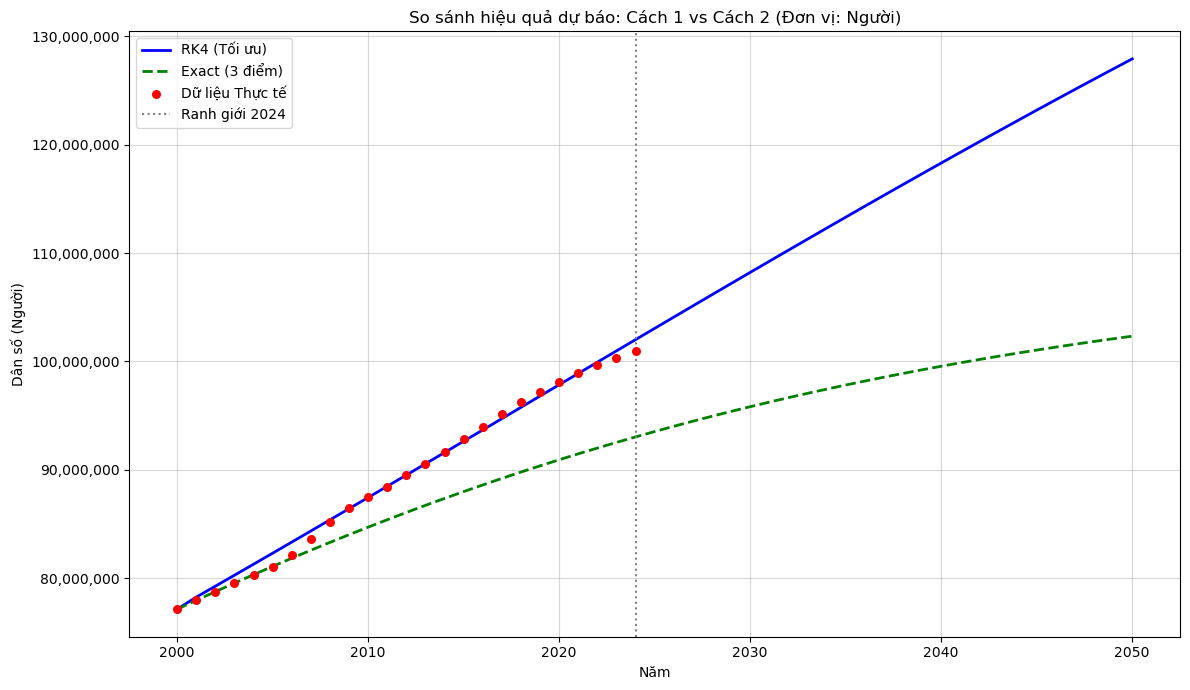

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. DỮ LIỆU THỰC TẾ (2000 - 2024) - ĐƠN VỊ: NGƯỜI ---
# Nguồn: World Bank & Tổng cục Thống kê
years_real = np.arange(2000, 2025)
pop_real = np.array([77154011, 77969361, 78772224, 79563777, 80338971, 81088313, 82167897,
                     83633375, 85175788, 86460018, 87455152, 88468314, 89510356, 90573104,
                     91679578, 92823254, 94000117, 95176977, 96237319, 97173776, 98079191,
                     98935098, 99680655, 100352192, 100987686]) 

# --- 2. THIẾT LẬP THAM SỐ (ĐỒNG BỘ ĐƠN VỊ NGƯỜI) ---

# SET 1: Nghiệm Tường Minh (Phương pháp 3 điểm)
# K và b đã ở đơn vị người
a_exact = 0.03619
K_exact = 109316435  # Sức chứa ~109 triệu người
b_exact = a_exact / K_exact

# SET 2: RK4 (Phương pháp Bình phương tối thiểu)
# Tham số gốc được tính trên đơn vị triệu người -> Cần quy đổi
a_rk4 = 0.021642
b_rk4_million = 0.000112363774706 
# Quy đổi b sang đơn vị người: b_nguoi = b_trieu / 1,000,000
b_rk4 = b_rk4_million / 1e6 

# Điều kiện ban đầu
N0 = pop_real[0] # Năm 2000
t_start = 2000
t_end = 2050
h = 1

# --- 3. CÁC HÀM TÍNH TOÁN ---

def logistic_deriv(t, N, a, b):
    return a * N - b * N**2

def rk4_solver(t_start, t_end, N0, a, b, h):
    years = np.arange(t_start, t_end + 1, h)
    N_values = [N0]
    current_N = N0
    for t in years[:-1]:
        k1 = h * logistic_deriv(t, current_N, a, b)
        k2 = h * logistic_deriv(t + 0.5*h, current_N + 0.5*k1, a, b)
        k3 = h * logistic_deriv(t + 0.5*h, current_N + 0.5*k2, a, b)
        k4 = h * logistic_deriv(t + h, current_N + k3, a, b)
        current_N += (k1 + 2*k2 + 2*k3 + k4) / 6.0
        N_values.append(current_N)
    return years, np.array(N_values)

def exact_solution(t_array, N0, a, b, t_start):
    K = a / b
    dt = t_array - t_start
    return K / (1 + (K/N0 - 1) * np.exp(-a * dt))

# --- 4. CHẠY MÔ PHỎNG ---

# Chạy RK4
years_sim, pop_rk4 = rk4_solver(t_start, t_end, N0, a_rk4, b_rk4, h)

# Chạy Nghiệm Tường Minh
pop_exact = exact_solution(years_sim, N0, a_exact, b_exact, t_start)

# --- 5. TẠO DATAFRAME VÀ TÍNH SAI SỐ ---

df = pd.DataFrame({
    'Năm': years_sim,
    'RK4 (Set 2)': pop_rk4,
    'Exact (Set 1)': pop_exact
})

df_real = pd.DataFrame({'Năm': years_real, 'Thực tế': pop_real})
df = pd.merge(df, df_real, on='Năm', how='left')

# Tính sai số tuyệt đối
df['% Sai số RK4'] = np.abs(df['RK4 (Set 2)'] - df['Thực tế']) / df['Thực tế'] * 100
df['% Sai số Exact'] = np.abs(df['Exact (Set 1)'] - df['Thực tế']) / df['Thực tế'] * 100

# Tính độ lệch giữa 2 phương pháp
df['% Độ lệch (RK4 vs Exact)'] = (df['RK4 (Set 2)'] - df['Exact (Set 1)']) / df['Exact (Set 1)'] * 100

# Tách bảng
df_past = df[df['Năm'] <= 2024][['Năm', 'Thực tế', 'RK4 (Set 2)', 'Exact (Set 1)', '% Sai số RK4', '% Sai số Exact']]
df_future = df[df['Năm'] > 2024][['Năm', 'RK4 (Set 2)', 'Exact (Set 1)', '% Độ lệch (RK4 vs Exact)']]

# --- 6. HIỂN THỊ KẾT QUẢ ---
# Định dạng số thực hiển thị dấu phẩy ngăn cách hàng nghìn
pd.set_option('display.float_format', '{:,.2f}'.format)

print("--- BẢNG 1: SO SÁNH VỚI DỮ LIỆU THỰC TẾ (2000 - 2024) [Đơn vị: Người] ---")
print(df_past[df_past['Năm'].isin(years_real)].to_string(index=False))

print("\n--- BẢNG 2: SO SÁNH GIỮA HAI MÔ HÌNH DỰ BÁO (2025 - 2050) [Đơn vị: Người] ---")
years_show_future = np.arange(2025, 2051, 1)
print(df_future[df_future['Năm'].isin(years_show_future)].to_string(index=False))

# --- 7. VẼ BIỂU ĐỒ ---
plt.figure(figsize=(12, 7))

# Vẽ đường RK4
plt.plot(df['Năm'], df['RK4 (Set 2)'], 'b-', label='RK4 (Tối ưu)', linewidth=2)

# Vẽ đường Exact
plt.plot(df['Năm'], df['Exact (Set 1)'], 'g--', label='Exact (3 điểm)', linewidth=2)

# Vẽ điểm thực tế
plt.scatter(years_real, pop_real, color='red', label='Dữ liệu Thực tế', zorder=5, s=30)

# Trang trí
plt.axvline(x=2024, color='gray', linestyle=':', label='Ranh giới 2024')
plt.title('So sánh hiệu quả dự báo: Cách 1 vs Cách 2 (Đơn vị: Người)')
plt.xlabel('Năm')
plt.ylabel('Dân số (Người)')
plt.legend()
plt.grid(True, alpha=0.5)

# Định dạng trục Y để hiển thị số đầy đủ thay vì 1e8
plt.ticklabel_format(style='plain', axis='y') 
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()